# Matplotlib

## Introducción

Matplotlib es la biblioteca "padre" de visualización de datos con Python. Fue creado por John Hunter. Lo creó para tratar de replicar las capacidades de trazado de MatLab (otro lenguaje de programación) en Python. Entonces, si está familiarizado con matlab, matplotlib será muy natural.

Es una excelente biblioteca de gráficos 2D y 3D para generar figuras científicas.

Algunas de las principales ventajas de Matplotlib son:

* Generalmente fácil de comenzar para dibujos simples
* Soporte para etiquetas y textos personalizados
* Gran control de cada elemento en una figura
* Salida de alta calidad en muchos formatos
* Muy personalizable en general

Matplotlib le permite crear figuras reproducibles mediante programación. ¡Aprendamos cómo usarlo! Antes de continuar con esta lección, te animo a explorar la página web oficial de Matplotlib: http://matplotlib.org/

    
## Importado

Importamos la librería `matplotlib.pyplot` bajo el nombre `plt`:

In [ ]:
import matplotlib.pyplot as plt

Esta línea también es necesaria para hacer visualizaciones convenientemente:

In [ ]:
%matplotlib inline

Esta línea es válida para *notebooks*, Si estás usando otro editor, haz uso de: **plt.show()** al final de tus comandos de dibujo.

___
# Ejemplo básico


### Ejemplo

Veamos un primer ejemplo con dos *arrays*:

In [ ]:
import numpy as np
x = np.linspace(-1, 1, 11)
y = x ** 2

In [ ]:
x

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [ ]:
y

array([1.  , 0.64, 0.36, 0.16, 0.04, 0.  , 0.04, 0.16, 0.36, 0.64, 1.  ])

## Comandos esenciales

Podemos crear un sencillo dibujo lineal como sigue:

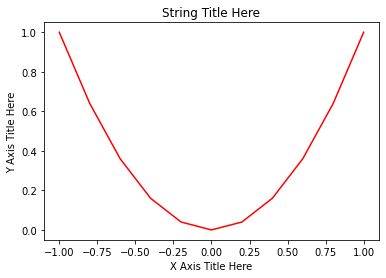

In [ ]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Múltiples ilustraciones

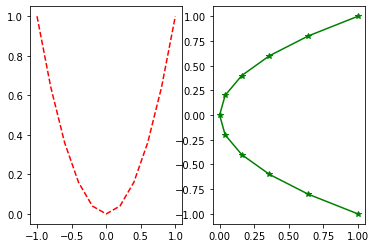

In [ ]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Matplotlib orientado a objetos

Veremos ahora un aintroducción formal instanciando objetos e invocando métodos para personalizar los dibujos.

## Introducción

La idea principal al usar el método Orientado a Objetos más formal es crear objetos de figura y luego simplemente llamar a métodos o atributos fuera de ese objeto. Este enfoque es mejor cuando se trata de un lienzo que tiene varias trazas.

Para comenzar, creamos una instancia de figura. Entonces podemos agregar ejes a esa figura:

Text(0.5, 1.0, 'Set Title')

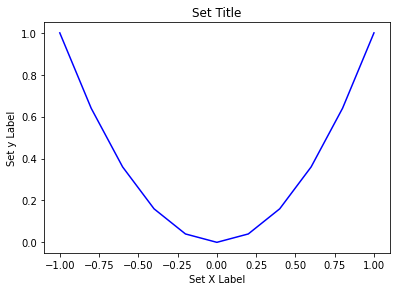

In [ ]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

El código es un poco más complicado, pero la ventaja es que ahora tenemos el control total de dónde se colocan los ejes de la traza y podemos agregar fácilmente más de un eje a la figura:

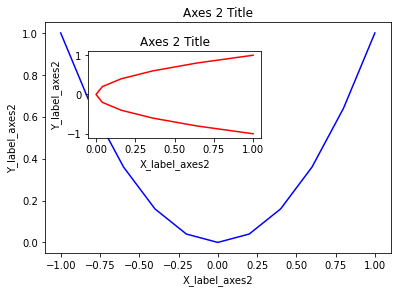

In [ ]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

El objeto plt.subplots() actuará de *manager* de los ejes.

Caso de uso:

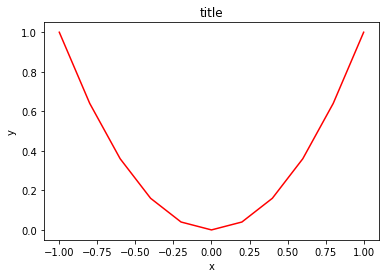

In [ ]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Podemos especificar el númeo de filas y columnas:

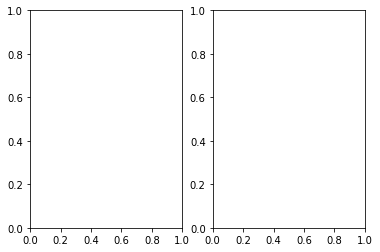

In [ ]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [ ]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f903e1d0fd0>,
      dtype=object)

También podemos iterar:

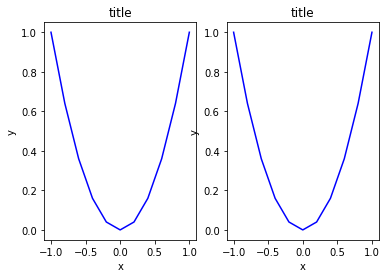

In [ ]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

Un problema común con matplolib es la superposición de subtrazas o figuras. Podemos usar el método **fig.tight_layout()** o **plt.tight_layout()**, que ajusta automáticamente las posiciones de los ejes en el lienzo de la figura para que no haya contenido superpuesto:

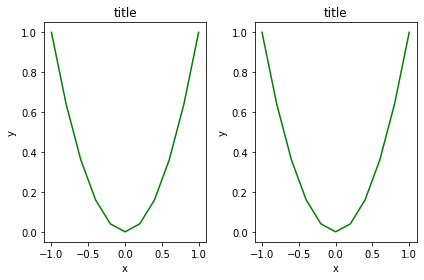

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

### Tamaño, ratio y DPI

Matplotlib permite especificar la relación de aspecto, DPI y el tamaño de la figura cuando se crea el objeto Figure. Puede utilizar los argumentos de palabra clave `figsize` y `dpi`.
* `figsize` es una tupla del ancho y alto de la figura en pulgadas.
* `dpi` son los puntos por pulgada (píxel por pulgada).

Por ejemplo:

In [ ]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>


Los mismos argumentos también se pueden pasar a los administradores de diseño, como la función `subplots`:

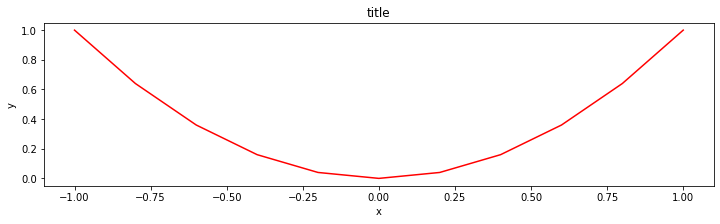

In [ ]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Guardar figuras
Matplotlib puede generar resultados de alta calidad en varios formatos, incluidos PNG, JPG, EPS, SVG, PGF y PDF.

Para guardar una figura en un archivo, podemos usar el método `savefig` en la clase `Figure`:

In [ ]:
fig.savefig("filename.png")

Aquí también podemos especificar opcionalmente el DPI y elegir entre diferentes formatos de salida:

In [ ]:
fig.savefig("filename.png", dpi=200)

## Leyenda, etiquetas y títulos

Ahora que hemos cubierto los conceptos básicos de cómo crear un lienzo de figura y agregar instancias de ejes al lienzo, veamos cómo decorar una figura con títulos, etiquetas de eje y leyendas.

**Títulos**

Se puede agregar un título a cada instancia de eje en una figura. Para establecer el título, use el método `set_title` en la instancia de ejes:

In [ ]:
ax.set_title("title");

**Ejes**

De manera similar, con los métodos `set_xlabel` y `set_ylabel`, podemos establecer las etiquetas de los ejes X e Y:

In [ ]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Leyenda

Puede usar el argumento de palabra clave **label="label text"** cuando se agregan gráficos u otros objetos a la figura, y luego usar el método **legend** sin argumentos para agregar la leyenda a la figura:

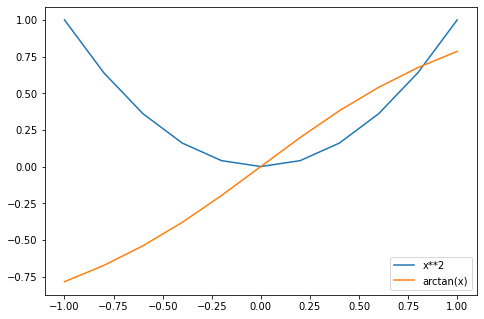

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, np.arctan(x), label="arctan(x)")
ax.legend()

¡Observe cómo la leyenda se superpone con parte de la traza real!

La función **leyenda** toma un argumento de palabra clave opcional **loc** que se puede usar para especificar en qué parte de la figura se dibujará la leyenda. Los valores permitidos de **loc** son códigos numéricos para los distintos lugares donde se puede dibujar la leyenda. Consulte la [página de documentación](http://matplotlib.org/users/legend_guide.html#legend-location) para obtener más detalles. Algunos de los valores **loc** más comunes son:

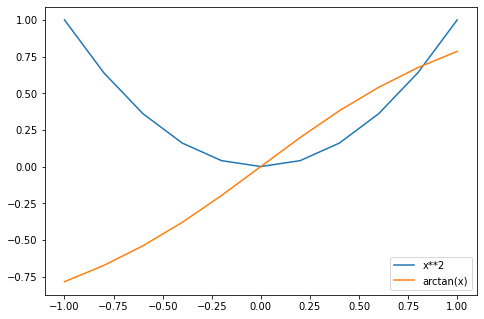

In [ ]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

## Colores y formatos de línea

Matplotlib le brinda *muchas* opciones para personalizar colores, anchos de línea y tipos de línea.

Existe la sintaxis básica similar a MATLAB (que le sugiero que evite usar para mayor claridad):

### Colores con sintaxis MatLab

Con matplotlib, podemos definir los colores de las líneas y otros elementos gráficos de varias maneras. En primer lugar, podemos usar la sintaxis similar a MATLAB donde `'b'` significa azul, `'g'` significa verde, etc. También se admite la API de MATLAB para seleccionar estilos de línea: donde, por ejemplo, 'b. -' significa una línea azul con puntos:

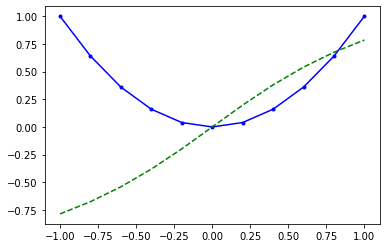

In [ ]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, np.arctan(x), 'g--') # green dashed line

### Colores con parámetro

También podemos definir colores por sus nombres o códigos hexadecimales RGB y, opcionalmente, proporcionar un valor alpha usando los argumentos de palabra clave `color` y `alpha`. Alpha indica opacidad.

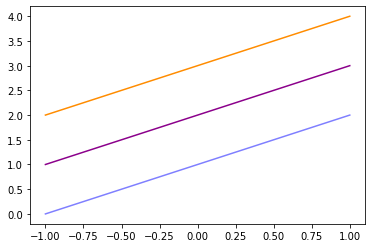

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Líneas y estilo

Para cambiar el ancho de línea, podemos usar el argumento de palabra clave `linewidth` o `lw`. El estilo de línea se puede seleccionar usando los argumentos de palabra clave `linestyle` o `ls`:

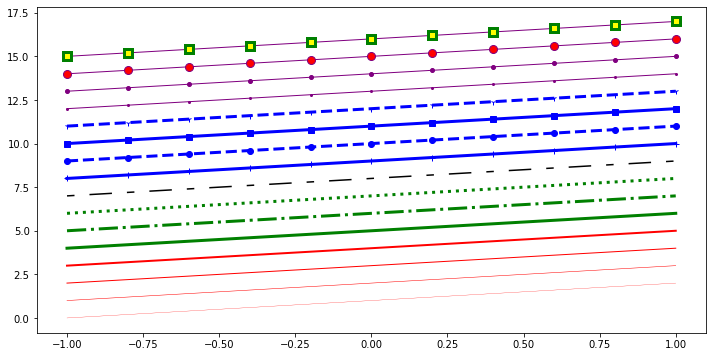

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Control de ejes

## Rango

Podemos configurar los rangos de los ejes usando los métodos `set_ylim` y `set_xlim` en el objeto del eje, o `axis('tight')` para obtener automáticamente rangos de ejes "ajustados":

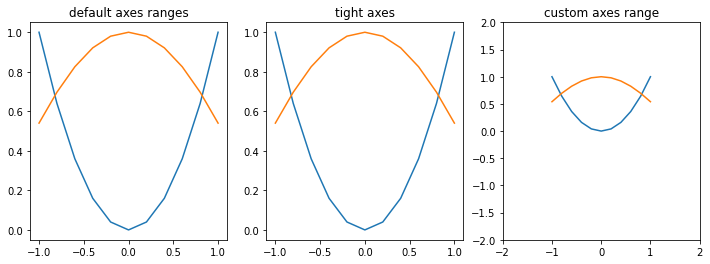

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, np.cos(x))
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, np.cos(x))
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, np.cos(x))
axes[2].set_ylim([-2,2])
axes[2].set_xlim([-2,2])
axes[2].set_title("custom axes range");

___
# Gráficos especiales

Hay muchos gráficos especializados que podemos crear, como gráficos de barras, histogramas, gráficos de dispersión y mucho más. La mayoría de estos tipos de gráficos los crearemos usando seaborn, una biblioteca de gráficos estadísticos para Python. Pero aquí hay algunos ejemplos de este tipo de trazas:

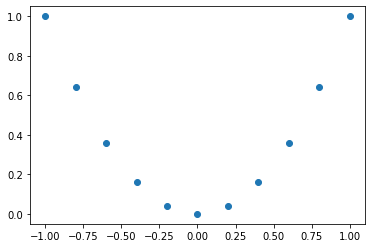

In [ ]:
plt.scatter(x,y)

(array([ 9., 14., 10., 11., 10.,  7., 10.,  9., 10., 10.]),
 array([ 14. , 111.1, 208.2, 305.3, 402.4, 499.5, 596.6, 693.7, 790.8,
        887.9, 985. ]),
 <a list of 10 Patch objects>)

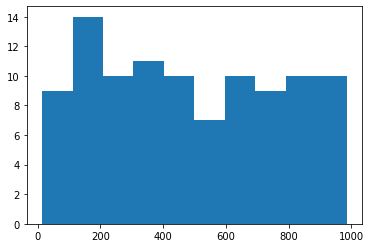

In [ ]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

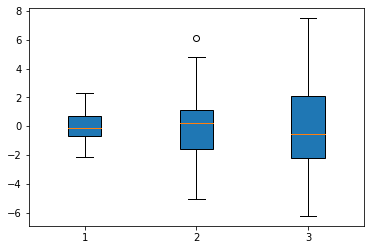

In [ ]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

___
# Conceptos avanzados

#### Escala logarítmica

También es posible establecer una escala logarítmica para uno o ambos ejes. De hecho, esta funcionalidad es solo una aplicación de un sistema de transformación más general en Matplotlib. Cada una de las escalas de los ejes se establece por separado utilizando los métodos `set_xscale` y `set_yscale` que aceptan un parámetro (con el valor "log" en este caso):

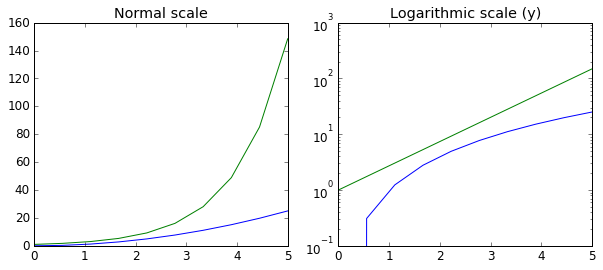

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Etiquetas customizadas

Podemos determinar explícitamente dónde queremos que marque el eje con `set_xticks` y `set_yticks`, que toman una lista de valores para el lugar del eje en el que se colocarán los ticks. También podemos usar los métodos `set_xticklabels` y `set_yticklabels` para proporcionar una lista de etiquetas de texto personalizadas para cada ubicación de marca:

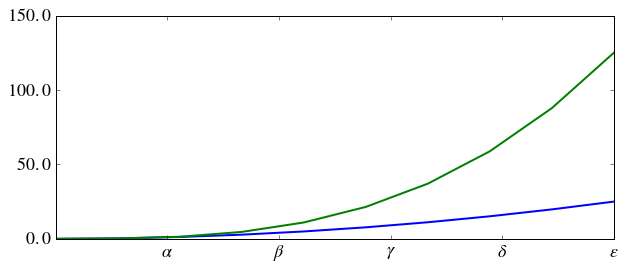

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

Hay una serie de métodos más avanzados para controlar la ubicación de las marcas principales y secundarias en las figuras de matplotlib, como la ubicación automática de acuerdo con diferentes criterios. Consulte http://matplotlib.org/api/ticker_api.html para obtener más detalles.


#### Notación científica

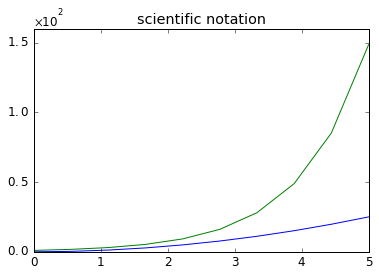

In [ ]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Numeración y espaciado en ejes

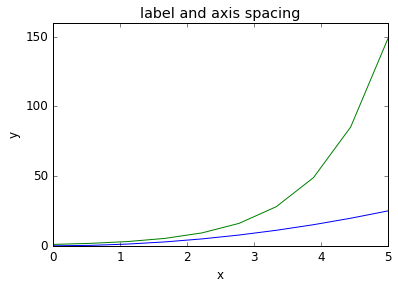

In [ ]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [ ]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Posicionamiento de ejes

Desafortunadamente, cuando se guardan figuras, las etiquetas a veces se recortan y puede ser necesario ajustar un poco las posiciones de los ejes. Esto se puede hacer usando `subplots_adjust`:

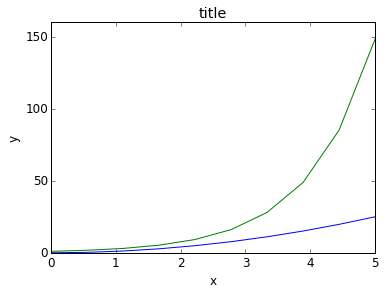

In [ ]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Mallado

Con el método `grid` en el objeto del eje, podemos activar y desactivar las líneas de cuadrícula. También podemos personalizar la apariencia de las líneas de la cuadrícula usando los mismos argumentos de palabras clave que la función `plot`:

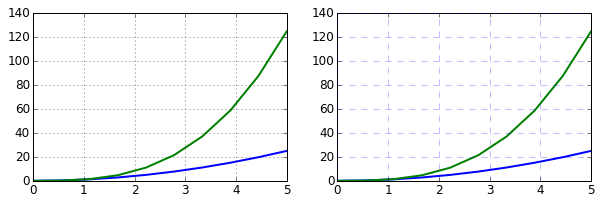

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Delimitaciones de ejes


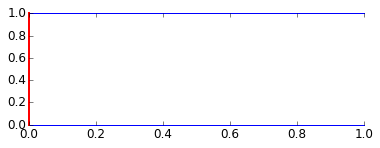

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Ejes dobles

A veces es útil tener ejes dobles x o y en una figura; por ejemplo, al trazar curvas con diferentes unidades juntas. Matplotlib admite esto con las funciones `twinx` y `twiny`:

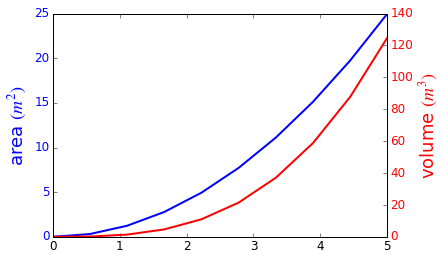

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Ejes donde x e y son cero

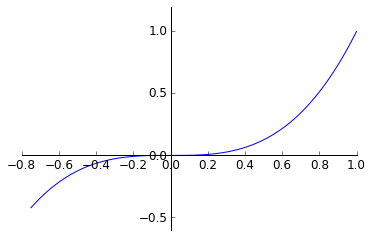

In [ ]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Otros estilos 2D

Además del método habitual `plot`, hay una serie de otras funciones para generar diferentes tipos de gráficos. Consulte la galería de gráficos de matplotlib para obtener una lista completa de los tipos de gráficos disponibles: http://matplotlib.org/gallery.html. Algunos de los más útiles se muestran a continuación:


In [ ]:
n = np.array([0,1,2,3,4,5])

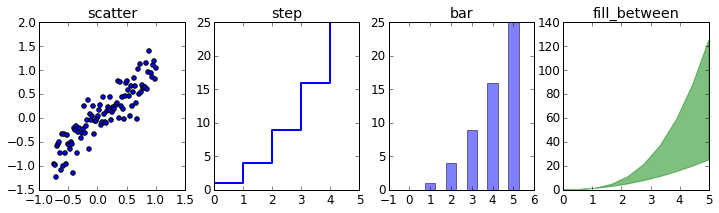

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

### Anotaciones

La anotación de texto en las figuras de matplotlib se puede hacer usando la función `texto`. Es compatible con el formato LaTeX al igual que los textos y títulos de etiquetas de eje:

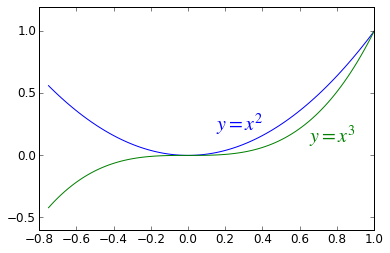

In [ ]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figuras con múltiples subplots

Los ejes se pueden agregar a un lienzo de figura matplotlib manualmente usando `fig.add_axes` o usando un administrador de diseño de subfigura como `subplots`, `subplot2grid` o `gridspec`:

#### subplots

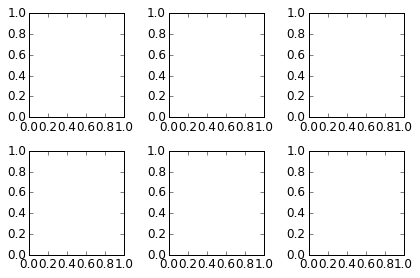

In [ ]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

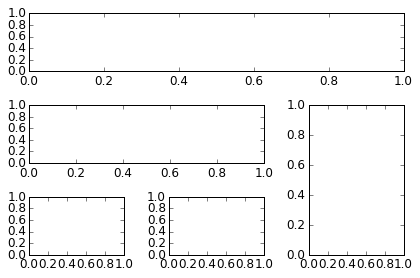

In [ ]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [ ]:
import matplotlib.gridspec as gridspec

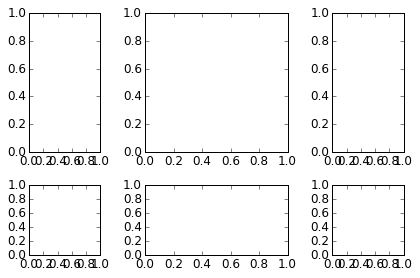

In [ ]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

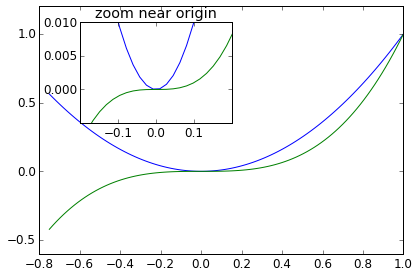

In [ ]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap y figuras de relieve

Los mapas de colores y las figuras de contorno son útiles para trazar funciones de dos variables. En la mayoría de estas funciones, utilizaremos un mapa de colores para codificar una dimensión de los datos. Hay una serie de mapas de colores predefinidos. Es relativamente sencillo definir mapas de colores personalizados. Para obtener una lista de mapas de colores predefinidos, consulte: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps


In [ ]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [ ]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

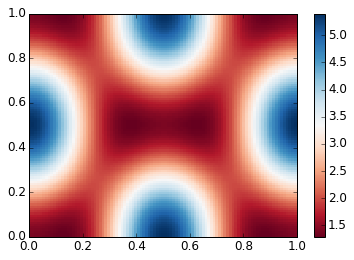

In [ ]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

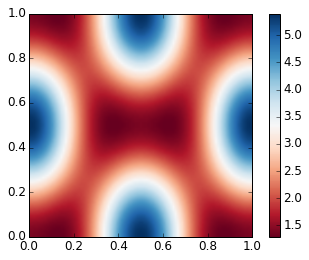

In [ ]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

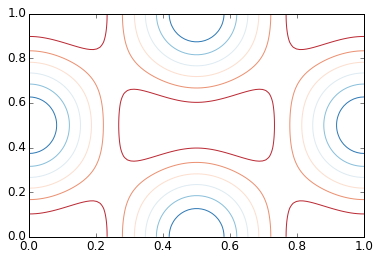

In [ ]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## Figuras 3D

Para usar gráficos 3D en matplotlib, primero debemos crear una instancia de la clase `Axes3D`. Los ejes 3D se pueden agregar a un lienzo de figuras matplotlib exactamente de la misma manera que los ejes 2D; o, más convenientemente, pasando un argumento de palabra clave `projection='3d'` a los métodos `add_axes` o `add_subplot`.

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Superficies

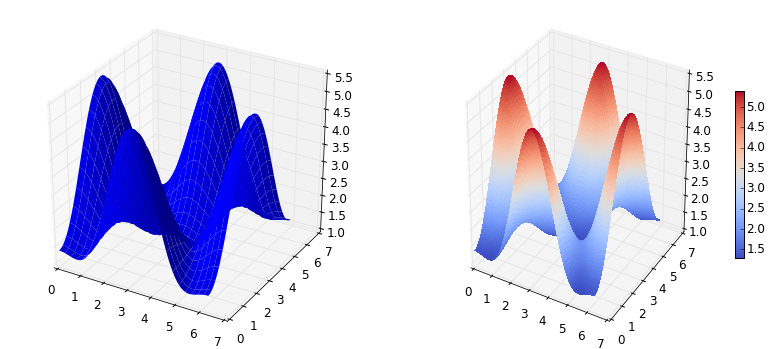

In [ ]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Mallado

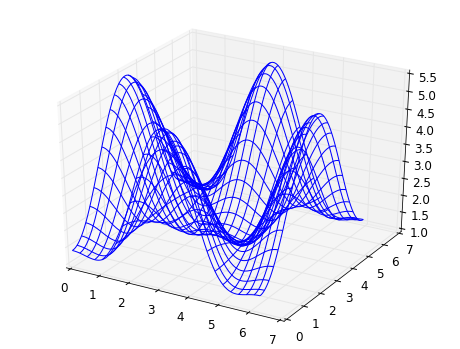

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Mapas de contorno con proyecciones

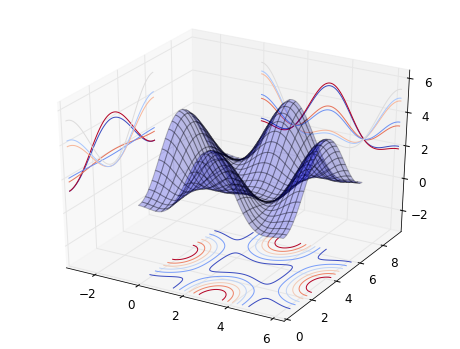

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);